In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import Dataset
import numpy as np


In [38]:
test_dataset = Dataset.from_file("./data/gsm8k_main/test/data-00000-of-00001.arrow")
print(test_dataset[0])

{'question': "Janet’s ducks lay 16 eggs per day. She eats three for breakfast every morning and bakes muffins for her friends every day with four. She sells the remainder at the farmers' market daily for $2 per fresh duck egg. How much in dollars does she make every day at the farmers' market?", 'answer': 'Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eggs a day.\nShe makes 9 * 2 = $<<9*2=18>>18 every day at the farmer’s market.\n#### 18'}


In [43]:
train_dataset = Dataset.from_file("./data/gsm8k_main/train/data-00000-of-00001.arrow")
print(train_dataset[0])

{'question': 'Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May. How many clips did Natalia sell altogether in April and May?', 'answer': 'Natalia sold 48/2 = <<48/2=24>>24 clips in May.\nNatalia sold 48+24 = <<48+24=72>>72 clips altogether in April and May.\n#### 72'}


In [40]:
print(train_dataset)
print(test_dataset)

Dataset({
    features: ['question', 'answer'],
    num_rows: 7473
})
Dataset({
    features: ['question', 'answer'],
    num_rows: 1319
})


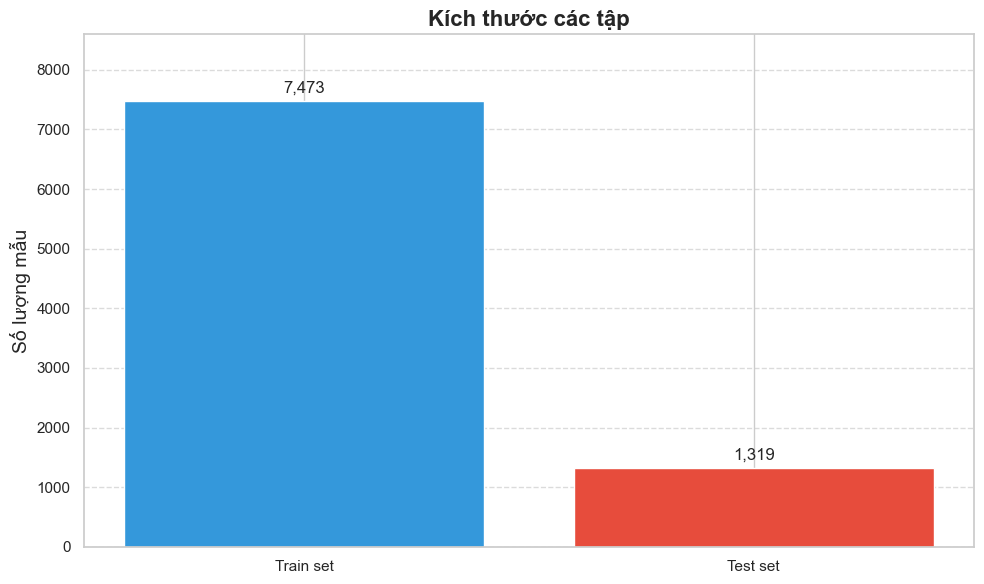

In [41]:
datasets = ['Train set', 'Test set',]
sizes = [len(train_dataset), len(test_dataset)]

plt.figure(figsize=(10, 6))
bars = plt.bar(datasets, sizes, color=['#3498db', '#e74c3c'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,
             f'{height:,}', ha='center', va='bottom', fontsize=12)

plt.title('Kích thước các tập', fontsize=16, fontweight='bold')
plt.ylabel('Số lượng mẫu', fontsize=14)
plt.ylim(0, max(sizes) * 1.15)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


>>> TẬP TRAIN - CÂU HỎI:
Min: 9, Max: 183, Mean: 45.09, Median: 42.0, Std: 17.48
>>> TẬP TRAIN - LỜI GIẢI:
Min: 4, Max: 216, Mean: 51.71, Median: 47.0, Std: 26.73

>>> TẬP TEST - CÂU HỎI:
Min: 15, Max: 164, Mean: 46.25, Median: 43.0, Std: 18.07
>>> TẬP TEST - LỜI GIẢI:
Min: 5, Max: 173, Mean: 52.78, Median: 49.0, Std: 26.74


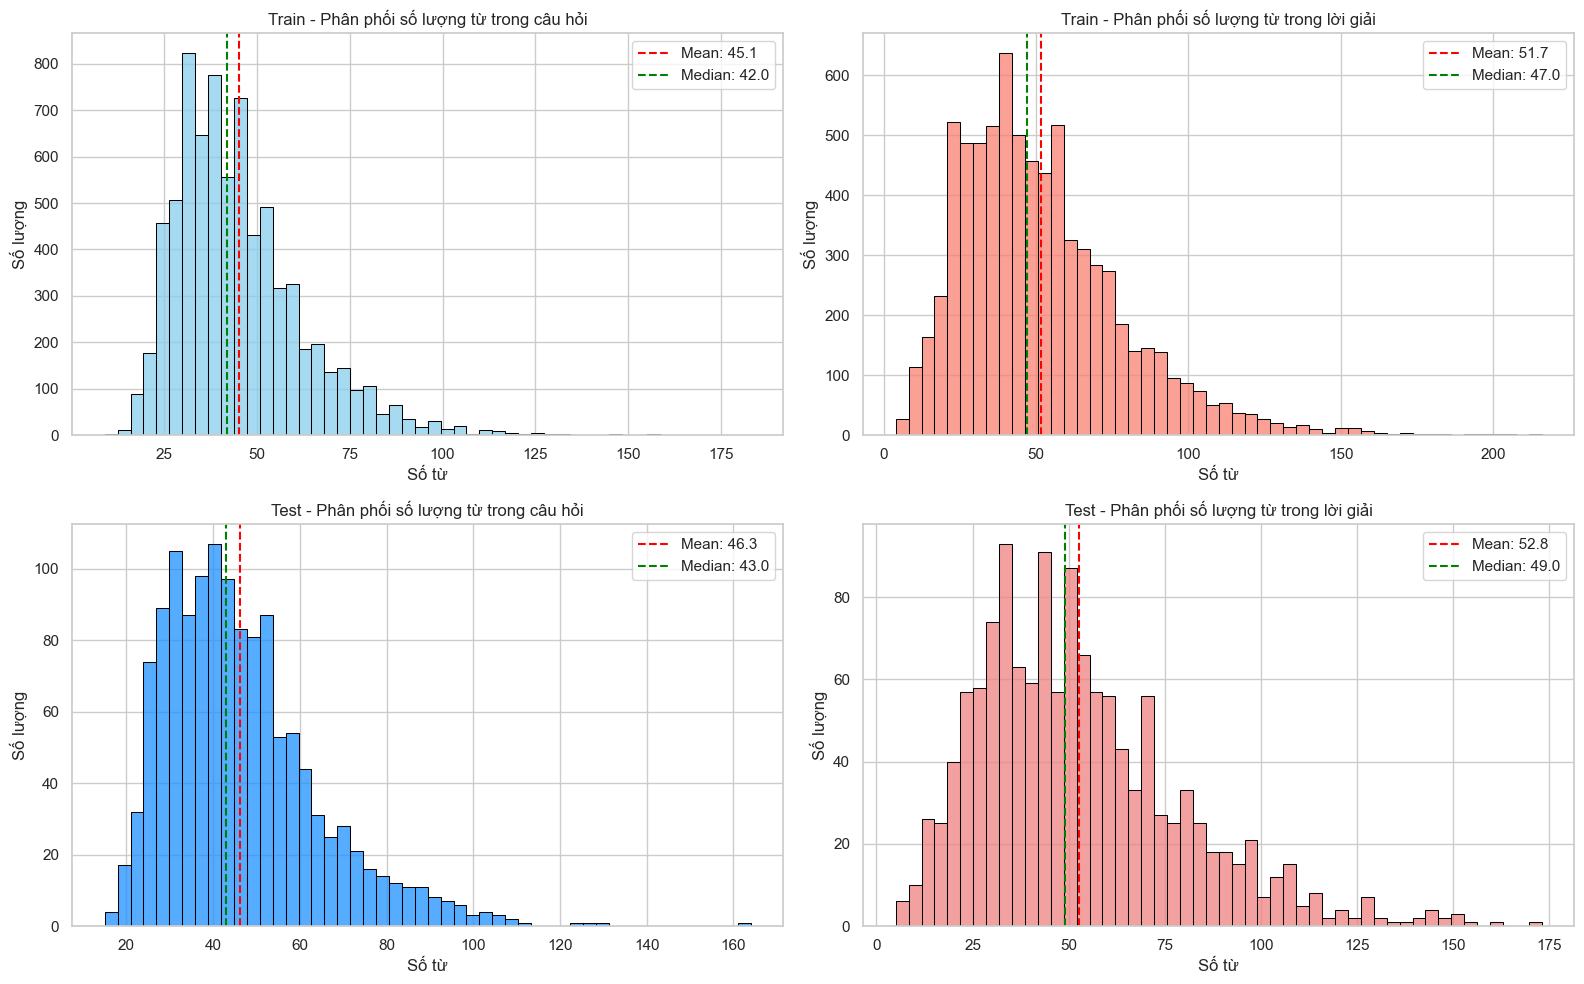

In [42]:
train_df=train_dataset.to_pandas()
test_df=test_dataset.to_pandas()
for df in [train_df, test_df]:
    df['question_word_count'] = df['question'].apply(lambda x: len(str(x).split()))
    df['answer_word_count'] = df['answer'].apply(lambda x: len(str(x).split()))
def print_stats(df, name=""):
    print(f"\n>>> {name.upper()} - CÂU HỎI:")
    print(f"Min: {df['question_word_count'].min()}, Max: {df['question_word_count'].max()}, "
          f"Mean: {df['question_word_count'].mean():.2f}, Median: {df['question_word_count'].median()}, "
          f"Std: {df['question_word_count'].std():.2f}")
    print(f">>> {name.upper()} - LỜI GIẢI:")
    print(f"Min: {df['answer_word_count'].min()}, Max: {df['answer_word_count'].max()}, "
          f"Mean: {df['answer_word_count'].mean():.2f}, Median: {df['answer_word_count'].median()}, "
          f"Std: {df['answer_word_count'].std():.2f}")
print_stats(train_df,name="Tập train")
print_stats(test_df,name="Tập test")
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

# Train - Question word count
plt.subplot(2, 2, 1)
sns.histplot(train_df['question_word_count'], bins=50, color='skyblue', edgecolor='black')
plt.axvline(train_df['question_word_count'].mean(), color='red', linestyle='--', label=f"Mean: {train_df['question_word_count'].mean():.1f}")
plt.axvline(train_df['question_word_count'].median(), color='green', linestyle='--', label=f"Median: {train_df['question_word_count'].median():.1f}")
plt.title("Train - Phân phối số lượng từ trong câu hỏi")
plt.xlabel("Số từ")
plt.ylabel("Số lượng")
plt.legend()
plt.grid(True)

# Train - Answer word count
plt.subplot(2, 2, 2)
sns.histplot(train_df['answer_word_count'], bins=50, color='salmon', edgecolor='black')
plt.axvline(train_df['answer_word_count'].mean(), color='red', linestyle='--', label=f"Mean: {train_df['answer_word_count'].mean():.1f}")
plt.axvline(train_df['answer_word_count'].median(), color='green', linestyle='--', label=f"Median: {train_df['answer_word_count'].median():.1f}")
plt.title("Train - Phân phối số lượng từ trong lời giải")
plt.xlabel("Số từ")
plt.ylabel("Số lượng")
plt.legend()
plt.grid(True)

# Test - Question word count
plt.subplot(2, 2, 3)
sns.histplot(test_df['question_word_count'], bins=50, color='dodgerblue', edgecolor='black')
plt.axvline(test_df['question_word_count'].mean(), color='red', linestyle='--', label=f"Mean: {test_df['question_word_count'].mean():.1f}")
plt.axvline(test_df['question_word_count'].median(), color='green', linestyle='--', label=f"Median: {test_df['question_word_count'].median():.1f}")
plt.title("Test - Phân phối số lượng từ trong câu hỏi")
plt.xlabel("Số từ")
plt.ylabel("Số lượng")
plt.legend()
plt.grid(True)

# Test - Answer word count
plt.subplot(2, 2, 4)
sns.histplot(test_df['answer_word_count'], bins=50, color='lightcoral', edgecolor='black')
plt.axvline(test_df['answer_word_count'].mean(), color='red', linestyle='--', label=f"Mean: {test_df['answer_word_count'].mean():.1f}")
plt.axvline(test_df['answer_word_count'].median(), color='green', linestyle='--', label=f"Median: {test_df['answer_word_count'].median():.1f}")
plt.title("Test - Phân phối số lượng từ trong lời giải")
plt.xlabel("Số từ")
plt.ylabel("Số lượng")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
